<a href="https://colab.research.google.com/github/brijeshpal/Deep-Learning/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test Wheather GPU is working

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

**Which GPU we are using?**

In [2]:
from tensorflow.python.client import device_lib

In [3]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16047081973871697832
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14626652160
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16739779792491051115
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

**RAM Information**

In [4]:
!cat /proc/meminfo

MemTotal:       13290452 kB
MemFree:         6234180 kB
MemAvailable:   11605472 kB
Buffers:          421856 kB
Cached:          5104964 kB
SwapCached:            0 kB
Active:          1175548 kB
Inactive:        5390524 kB
Active(anon):       1872 kB
Inactive(anon):  1050832 kB
Active(file):    1173676 kB
Inactive(file):  4339692 kB
Unevictable:          20 kB
Mlocked:              20 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               712 kB
Writeback:             0 kB
AnonPages:       1039344 kB
Mapped:           840420 kB
Shmem:             13440 kB
KReclaimable:     183492 kB
Slab:             244348 kB
SReclaimable:     183492 kB
SUnreclaim:        60856 kB
KernelStack:        7724 kB
PageTables:        14816 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6645224 kB
Committed_AS:    4290948 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       84620 kB
VmallocChunk:    

**Running ANN using GOOgle Colab**

In [1]:
!pip install -q keras

In [2]:
import pandas as pd

Epoch 1/100
536/536 [==============================] - 5s 5ms/step - loss: 0.5769 - accuracy: 0.7914 - val_loss: 0.5503 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 5ms/step - loss: 0.5380 - accuracy: 0.7962 - val_loss: 0.5250 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5172 - accuracy: 0.7962 - val_loss: 0.5094 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 3s 6ms/step - loss: 0.5026 - accuracy: 0.7962 - val_loss: 0.4979 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4915 - accuracy: 0.7962 - val_loss: 0.4885 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4828 - accuracy: 0.7962 - val_loss: 0.4813 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 2s 5ms/step - loss: 0.4756 - accuracy: 0.7962 - val_loss: 0.4753 - val_accuracy: 0.7955

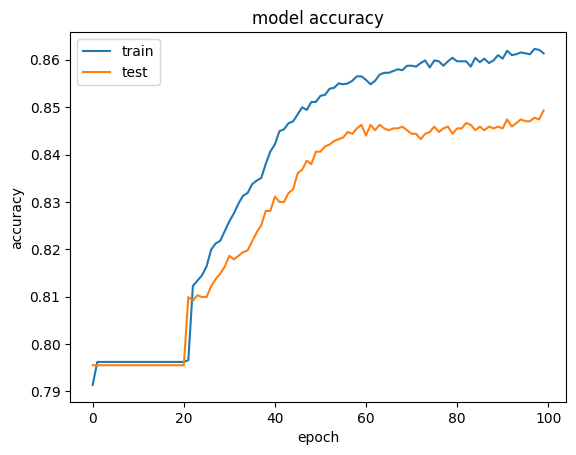

63/63 [==============================] - 0s 2ms/step
[[1526   69]
 [ 211  194]]
0.86


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset=pd.read_csv('/content/drive/MyDrive/ANN/Churn_Modelling.csv')
x=dataset.iloc[:, 3:13]
y=dataset.iloc[:, 13]

## Create dummy Variable


geography=pd.get_dummies(x["Geography"],drop_first=True)
gender=pd.get_dummies(x["Gender"],drop_first=True)

##Concatenate the data Frames

x=pd.concat([x,geography,gender],axis=1)

## drop unnecessary columns

x=x.drop(['Geography','Gender'],axis=1)

## splitting the dataset into the training set and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)


#Feature Scalling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


##part 2 now lets make the ann

## importing the keras library and package

import keras
from keras.models import Sequential
from keras.layers import Dense

#rom keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras.initializers import HeUniform

##initialising the ANN

classifier = Sequential()


## adding the input layer and the first hidden layer

from keras.layers import Input

# Adding an Input layer before the Dense layers
classifier.add(Input(shape=(11,)))  # shape=(11,) for 11 input features
classifier.add(Dense(units=6, kernel_initializer=HeUniform(), activation='relu'))


#lassifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu',input_dim=11))
# adding second hidden layer
classifier.add(Dense(units=6, kernel_initializer=HeUniform(), activation='relu'))

# Adding the output layer

classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))


## Compiling the ANN

classifier.compile(optimizer='Adamax', loss= 'binary_crossentropy', metrics = ['accuracy'])


## Fittint the ANN to the traoining set

model_history=classifier.fit(x_train,y_train,validation_split=0.33, batch_size=10, epochs= 100)

#list all data in history

print(model_history.history.keys())

#summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#making the predictions and evoluating the model

# Predicting the test set result

y_pred = classifier.predict(x_test)
y_pred = (y_pred>0.5)

#making the confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)


#Calculate the accuracy

from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)
